In [30]:
import pandas as pd

In [31]:
types =  ["archaea", "bacteria", "fungi", "invertebrate", "plant", "protozoa", "vertebrate_mammalian", "vertebrate_other", "viral"]


In [32]:
dataPath = "MikeData/dataset10/"
data = pd.read_csv (dataPath+"dataset_10.tsv", sep = '\t', header=None)

In [33]:
data.columns = ["type", "name", "filename"]
data

,type,name,filename
0,archaea,Methanococcoides_vulcani,GCF_900111645.1_IMG-taxon_2642422537_annotated...
1,archaea,Natrinema_ejinorense,GCF_002494345.1_ASM249434v1
2,archaea,Nitrososphaera_viennensis,GCF_000698785.1_ASM69878v1
3,archaea,Thermococcus_siculi,GCF_002214505.1_ASM221450v1
4,archaea,Staphylothermus_hellenicus,GCF_000092465.1_ASM9246v1
...,...,...,...
85,viral,Rhodococcus_phage_ReqiPine5,GCF_000918695.1_ViralProj240746
86,viral,Milk_vetch_dwarf_C2_alphasatellite,GCF_000916115.1_ViralProj239034
87,viral,Burkina_Faso_astrovirus,GCF_000923215.1_ViralProj255104
88,viral,Shinobi_tetravirus,GCF_004130715.1_ASM413071v1


In [44]:
viralFileNames = list(data[data.type == "viral"].filename)
viralFileNames

['GCF_002617325.1_ASM261732v1',
 'GCF_005892185.1_ASM589218v1',
 'GCF_001743835.1_ViralProj344146',
 'GCF_004117155.1_ASM411715v1',
 'GCF_001754985.1_ViralMultiSegProj344321',
 'GCF_000918695.1_ViralProj240746',
 'GCF_000916115.1_ViralProj239034',
 'GCF_000923215.1_ViralProj255104',
 'GCF_004130715.1_ASM413071v1',
 'GCF_008945625.1_ASM894562v1']

In [59]:
import os
from Bio import SeqIO
viralGenomes = []
for fileName in viralFileNames:
    filePath = dataPath+fileName+"_genomic.fna"
    if os.path.exists(filePath):
        g = SeqIO.parse(filePath, "fasta")
        viralGenomes += list(g)

In [65]:
sV = list(map(lambda x: str(x.seq), viralGenomes))
def freqAnalysis(kmerLength, genomes):
    pass

In [70]:
g = sV[0]
g

'AAGCCCCACCCCGTCTGGGCTGGGACTCCATCGGAGTGCCGGACGGATTTTGTCTGCCACGTGTTGGGGACCACGACCAACGACCATTTACTAATGGACCTCGACCACGACCACCGGGACCATCGGACAATGACCGTTAGTAAATGGACCATTGGACCGGAGGGGTTTGTAAATTATCATGGGGGTGTCGTATAGTTCGTGGACCAATTTTTTCCGGGACCAGTTTTGAAGTTTTTACTAAAACGGAGGACCAGATGACCAGACCGAAGAGGAGATTGATTGTAGTCGAGGACCGATGCTTCCGGGGACATGCCCCCATTCGAATTGTGCGGGGCTCTGCGAAGGCTTCCGTATGCTATCAATGTCATCGTATGCAAAGAAAGCACGCACGCATGGTAGCACGCTGCCACAACCCAAAGGACCCAAGGTACAAGAACTACGGAGGGCGCGGGATCAGCGTATGCCCAGAATGGCGTAACTCATTTACTAAATGGTATGAGGACTTCGGCTACCTCGTAGATGGGAATGACCTGACTATGGACCGTAGGGATAACGATGGGGATTACGAGCCGGGGAATATGCGTGCAGCCACTACCCAAGAGCAAAACCGCAACCAACGAAGAAGTGTTTTACTAACGTACGATGGGGAGACGCTGAATCAACAGGTGTGGGCAGATAGGTTCGGCTTTCATAAATCCAGTATACAGCGACGCCTTGGTGGGAAGTACCGGAATGATATAGAATGGGTACTCTTTGGCGTACGCACTACTATTACTAAAACGGAGGTACTGATTACTAAGGACAGGAAGCGGTTGAACTTGCGTGCTTGGTGTAGATCGCTGGGTTTCTCACTACGCACAGTAGAGGACCGGGTATACAAGTTCGGCTGGAGTTATGCGCAGGCACTCGGCTTTGCCTCCCGGAAGGGAAAACTTAGACCACCGCGTACAAAGGATTAGTAAATAATAGTTGCAGTTAGTAACACTGTGGCATATACTC

In [124]:
from collections import Counter
n = len(g)//6
parts = list(map(lambda i: g[6*i:6*(i+1)], range(n)))
c = Counter(parts)

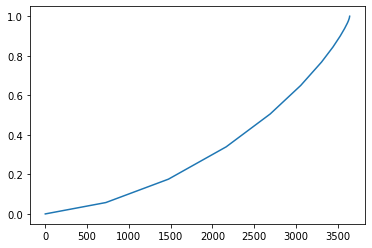

In [125]:
import matplotlib.pyplot as plt
import numpy as np
cs = np.cumsum(sorted(c.values()))
cs = cs/cs[-1]
plt.plot(cs)

In [126]:
def hammingDistance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

In [127]:
itemsAndCounts = sorted(c.items(), key=lambda x: x[1])

In [207]:
topN = 64
dist = 16
kmers = 10
parts = list(map(lambda i: g[kmers*i:kmers*(i+1)], range(len(g)//kmers)))
c = Counter(parts)
itemsAndCounts = sorted(c.items(), key=lambda x: x[1])
mostFreq = itemsAndCounts[-topN:]
print(sum(map(lambda x: x[1], mostFreq)))
itemsAndCounts= itemsAndCounts[:-topN]
for (s1, v1) in itemsAndCounts:
    for i in range(topN):
        (s2, v2) = mostFreq[i]
        if hammingDistance(s1, s2) == dist:
            mostFreq[i] = (s2, v2+v1)
            break

132


In [208]:
sum(map(lambda x: x[1], mostFreq)), sum(map(lambda x: x[1], mostFreq))/(len(g)//kmers)

(132, 0.017288801571709235)

In [209]:
itemsAndCounts[-10:]

[('CAAAAAGATC', 2),
 ('GAAGATGATC', 2),
 ('TTTACTAAAC', 2),
 ('TTAAAGGAGC', 2),
 ('GCAGGCTAAG', 2),
 ('CACCACGAGC', 2),
 ('TTACCAACCG', 2),
 ('AGTACAACAA', 2),
 ('AGCAACCGGG', 2),
 ('TGGTCGTAAG', 2)]